In [1]:
# Importing cell

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import networkx as nx


-----------------------------

# Physical Models of Living Systems

#### *Rafaele Gaudio 2057974*

-----------------------------

## Week 4-5: - Deadline 17 November 

1) Generate a random a SxS matrix with C non zero entries and 1-C zeros (C is between zero and one). Set the diagonal to -d. The non-zero elements are drawn  from a given distributions. Calculate the eigenvalues. Repeat different realizations and plot all the eigenvalues in the complex plane [Real part (x-axis) and imaginary part (y-axis)]. Compare this result with the expectations from the circular law. 

2) Generate the same as above but for mutualistic structure and find how the maximum real eigenvalues scales with S (use S=20,30,40,..100) and compares your numerical finding with the analytical expectations (we did not explicitly have calculated this in class). 

3) Analyse the food web using the metrics we have seen in class. The file represent the weighted adjacency matrix of the food web. For the analysis you can binarize (zero and one) the matrix. You find the file in the google drive.

4) Optional: calculate the same as 1) but with for the cascade model or for the nested mutualistic network. You follow detailed step by step explanation in the "Homework-detail-week3-from-Allesina-Stability-Criteria-2012-Nature.pdf" (also uploaded in the Google Drive, note folder)


-----------------------------

In [2]:
def RAND_MARIX(S,C,d,sigma=1):
    #"""""""""""""""""""""""""""""""""""""""""""""""
    # Function that generates random matrix 
    #
    # @S: int, number of species
    # @C: float, desired level of connectance
    # @d: float, absolute value of the diagonal
    # @sigma: float, std of the normal distribution
    #
    # Returns: numpy array, the random matrix
    #"""""""""""""""""""""""""""""""""""""""""""""""

    RM=np.zeros((S,S))
    
    for i in range(S):
        for j in range(S):
            if (i != j):
                p=np.random.uniform()
                if (p<=C):
                    RM[i][j]=np.random.normal(loc=0.0,scale=sigma**2)
            else:
                RM[i][j]=(-d)

    return(RM)

In [3]:
def MUTUAL_MARIX(S,C,d,sigma=1):
    #"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    # Function that generates random matrix with mutual interaction
    #
    # @S: int, number of species
    # @C: float, desired level of connectance
    # @d: float, absolute value of the diagonal
    # @sigma: float, std of the normal distribution
    #
    # Returns: numpy array, the random matrix with mutual interaction
    #"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    
    MM=np.zeros((S,S))
    
    for i in range(S):
        for j in range(S):
            if (i != j):
                if (i>j):
                    p=np.random.uniform()
                    if (p<=C):
                        MM[i][j]=abs(np.random.normal(loc=0.0,scale=sigma**2))
                        MM[j][i]=abs(np.random.normal(loc=0.0,scale=sigma**2))
            else:
                MM[i][j]=(-d)

    return(MM)

In [4]:
def PRED_PRAY_MARIX(S,C,d,sigma=1):
    #""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    # Function that generates random matrix with predator-pray interaction
    #
    # @S: int, number of species
    # @C: float, desired level of connectance
    # @d: float, absolute value of the diagonal
    # @sigma: float, std of the normal distribution
    #
    # Returns: numpy array, the random matrix with predator-pray interaction
    #""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    
    PPM=np.zeros((S,S))
    
    for i in range(S):
        for j in range(S):
            if (i != j):
                if (i>j):
                    p1=np.random.uniform()
                    if (p1<=C):
                        p2=np.random.uniform()
                        if (p2<=0.5):
                            PPM[i][j] = abs(np.random.normal(loc=0.0,scale=sigma**2))
                            PPM[j][i] = -abs(np.random.normal(loc=0.0,scale=sigma**2))
                        else:
                            PPM[i][j] = -abs(np.random.normal(loc=0.0,scale=sigma**2))
                            PPM[j][i] = abs(np.random.normal(loc=0.0,scale=sigma**2))
            else:
                PPM[i][j]=(-d)

    return(PPM)

In [5]:
def MIXED_MARIX(S,C,d,sigma=1):
    #""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    # Function that generates random matrix with predator-pray and mutual interaction
    #
    # @S: int, number of species
    # @C: float, desired level of connectance
    # @d: float, absolute value of the diagonal
    # @sigma: float, std of the normal distribution
    #
    # Returns: numpy array, the random matrix with predator-pray and mutual interaction
    #""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    
    PPM=np.zeros((S,S))
    
    for i in range(S):
        for j in range(S):
            if (i != j):
                if (i>j):
                    p1=np.random.uniform()
                    if (p1<=C):
                        p2=np.random.uniform()
                        if (p2<=0.5):
                            PPM[i][j] = abs(np.random.normal(loc=0.0,scale=sigma**2))
                            PPM[j][i] = abs(np.random.normal(loc=0.0,scale=sigma**2))
                        else:
                            PPM[i][j] = -abs(np.random.normal(loc=0.0,scale=sigma**2))
                            PPM[j][i] = -abs(np.random.normal(loc=0.0,scale=sigma**2))
            else:
                PPM[i][j]=(-d)

    return(PPM)

In [6]:
def eig_finder(matrix,norm=False):
    #"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    # Function that extract eigenvalues from a matrix 
    #
    # @matrix: array, matrix from witch we want evaluate eigenvalues
    # @norm: bool, if set True normalizes eigenvalues
    #
    # Returns: numpy array, two dimentional array with the eigenvalues
    #          comontent [0]: real part of the eigenvalues
    #          component [1]: immaginary part of the eigenvalues
    #"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    
    from numpy import linalg as LA

    if(norm==True):
        k=np.sqrt(matrix.shape[0])
        eigenvalues=LA.eig(matrix/k)[0]

    else:
        eigenvalues=LA.eig(matrix)[0]

    Re_eig=eigenvalues.real
    Imm_eig=eigenvalues.imag

    output=np.array([[Re_eig],[Imm_eig]])
    return(output)

## 1. Random matrix 

In [7]:
S=5
C=0.6
d=1.6
sigma=1

A=RAND_MARIX(S,C,d,sigma)

print("Example of Random matrix: \n")
print(A)

Example of Random matrix: 

[[-1.6        -0.40463697  1.0510734  -1.28554848  0.        ]
 [-0.80390646 -1.6        -0.42987253  0.          0.        ]
 [ 1.27517805 -1.63510844 -1.6         0.23558533  1.19595873]
 [ 0.          1.04468843 -1.33063349 -1.6        -0.02843162]
 [ 0.         -1.70867862 -1.41608862  0.58729564 -1.6       ]]


### 1.1.  Scatter-plot of the eigenvalues varying S

Let's start by observing the eigenvalues distribution varying the dimension of the matrix S.

In [8]:
S=[5,10,30,50,100]
eigs=[]

for s in S:
    A=RAND_MARIX(s,C,d,sigma)
    eigs.append(eig_finder(A,norm=True)) #the eigenvalues have been normalized to laid on the unitary disk

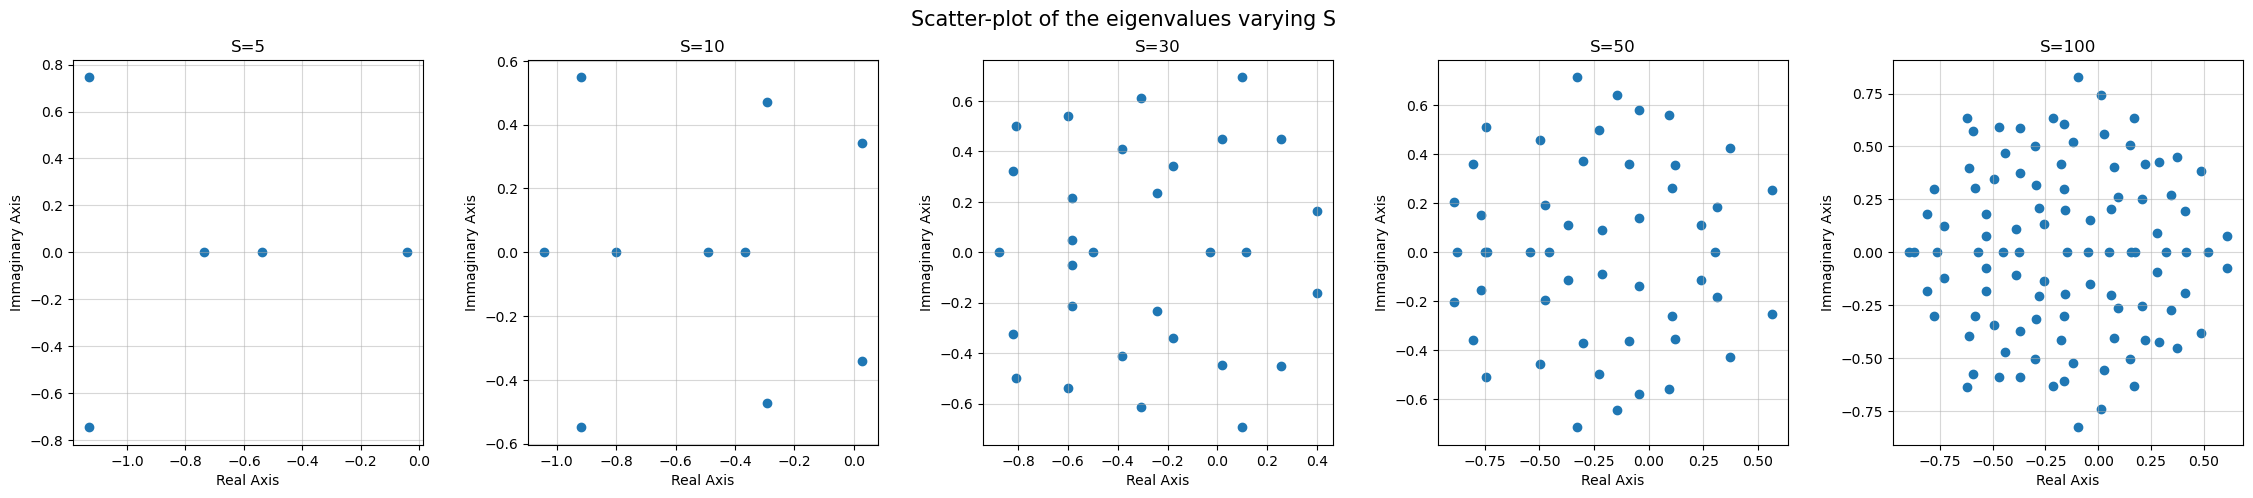

In [9]:
fig, ax = plt.subplots(1,5,figsize=(28,5))
plt.subplots_adjust(wspace=0.3)
plt.suptitle("Scatter-plot of the eigenvalues varying S",fontsize=15)


for i in range(5):
    ax[i].grid(alpha=0.5)
    ax[i].scatter(eigs[i][0],eigs[i][1])
    ax[i].set(xlabel="Real Axis", ylabel="Immaginary Axis", title="S={}".format(eigs[i][0].shape[1]))



As we can see, increasing the dimensionality, the circular law appears more and more evident.

### 1.2. Circular Law

In this section we simulate 1000 times a random matrix in order to verify the circular law.

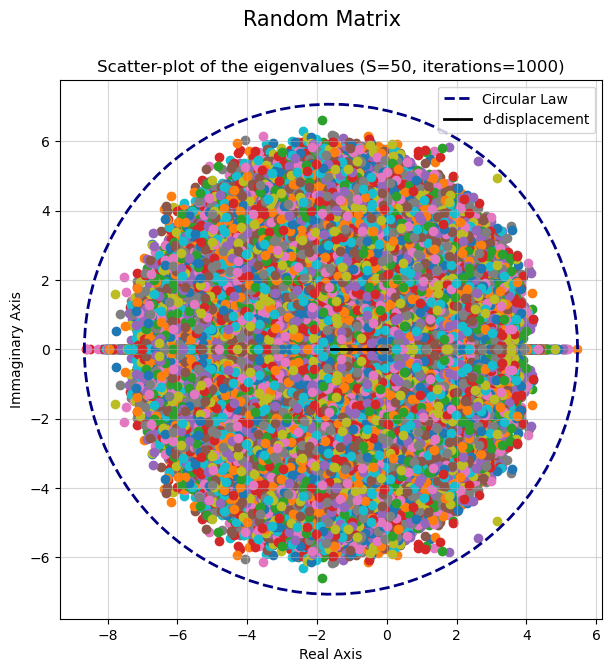

In [10]:
S=50
C=0.6
d=1.6
sigma=1

iterations=1000

rand_eig=[]

x_displacement=np.linspace(-d,0,100)
y_displacement=np.zeros_like(x_displacement)

theta=np.linspace(0,2*np.pi,100)
r=np.sqrt(S)*sigma
x=r*np.cos(theta)-d
y=r*np.sin(theta)

fig, ax = plt.subplots(figsize=(7,7))
plt.suptitle("Random Matrix",fontsize=15)
ax.set(xlabel="Real Axis", ylabel="Immaginary Axis", title="Scatter-plot of the eigenvalues (S={}, iterations={})".format(S,iterations))
ax.grid(alpha=0.5)

for i in range(iterations):
    A=RAND_MARIX(S,C,d,sigma)
    rand_eig.append(eig_finder(A,norm=False))

    ax.scatter(rand_eig[i][0],rand_eig[i][1])  

ax.plot(x,y,color="navy",linestyle="dashed",lw=2,label="Circular Law")
ax.plot(x_displacement,y_displacement,color="black",lw=2,label="d-displacement")
ax.legend();

The circular law seems to be satisfied: pratically all the eigenvalues laid in the disk of center $(-d,0)$ and radius $r=\sigma\sqrt{S}$. 

It could happen that by relaunching the simulation some eigenvalues (typically $<5$) end up outside the circle, but this is equivalent to an error of the order $\sim 10^{-5}$ attributable to the precision of the machine.

## 2. Random matrix with mutualistic interaction

In [11]:
S=5
C=0.6
d=1.6
sigma=1

M=MUTUAL_MARIX(S,C,d,sigma)

print("Example of Random matrix with mutualistic interaction: \n")
print(M)

Example of Random matrix with mutualistic interaction: 

[[-1.6         0.          2.02238171  0.          1.77650607]
 [ 0.         -1.6         0.71091445  0.          0.        ]
 [ 0.12831712  0.53444876 -1.6         0.          0.        ]
 [ 0.          0.          0.         -1.6         1.23277338]
 [ 0.62855163  0.          0.          0.52203339 -1.6       ]]


### 2.1. $\Re(\lambda_{\max})$ varying S

For this analysis, nine random matrix with mutualistic interatcion and dimension $S=[20,30,40,..,100]$ have been simulated 1000 times. The $\Re(\lambda_{\max})$ obtained for each matrix and each simulation have been plotted vs $S$ and fitted with a linear fit and a root-square fit.

-------------------------------------------------
Fit function: y=a*x+b
Params: 
-------------------------------------------------
a = 0.472295400949158 +/- 0.012960623307702123
b = -1.5360715887121281 +/- 0.8465843818186832
-------------------------------------------------
-------------------------------------------------
Fit function: y=sqrt(a*x)+b
Params: 
-------------------------------------------------
a = 47.93778581565062 +/- 2.7684352495035993
b = -25.425180390388153 +/- 1.5486071363609655
-------------------------------------------------


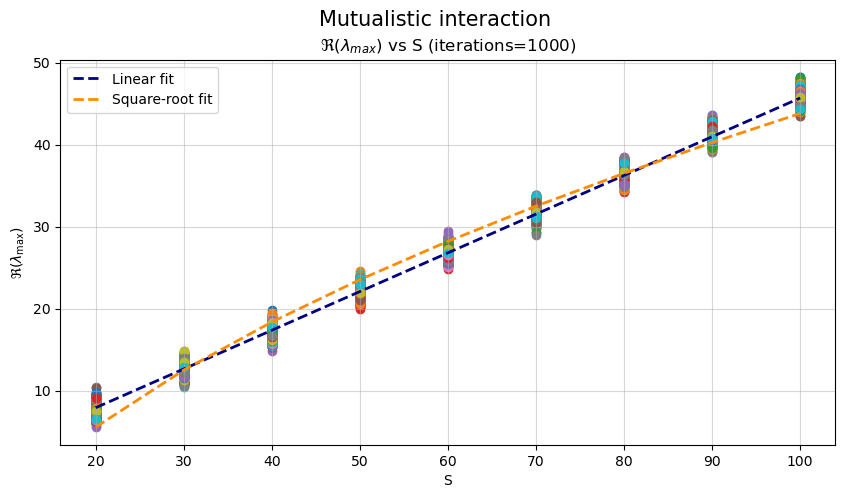

In [12]:
S=np.linspace(20,100,9)
iterations=1000

# fit functions

def f_1(x,a,b):
    y=a*x+b
    return(y)

def f_2(x,a,b):
    y=np.sqrt(a*x)+b
    return(y)

# max real eigenvalues extraction, plot and fit

fig, ax = plt.subplots(figsize=(10,5))
plt.suptitle("Mutualistic interaction",fontsize=15)
ax.set(xlabel="S",ylabel="$\Re(\lambda_{\max})$",title="$\Re(\lambda_{max})$ vs S (iterations=1000)")
ax.grid(alpha=0.5)

for k in range(iterations):

    eigs=[]
    for s in S:
        M=MUTUAL_MARIX(int(s),C,d,sigma)
        eigs.append(eig_finder(M,norm=False))

    Re_max=[]
    for i in range(len(eigs)):
        Re_max.append(np.max(eigs[i][0]))
    
    ax.scatter(S,Re_max)
  
popt_1, pcov_1 = curve_fit(f_1,S,Re_max)
popt_2, pcov_2 = curve_fit(f_2,S,Re_max)

ax.plot(S,f_1(S,*popt_1),ls="dashed",color="navy",lw=2,label="Linear fit")
ax.plot(S,f_2(S,*popt_2),ls="dashed",color="darkorange",lw=2,label="Square-root fit")
ax.legend();

print("-------------------------------------------------\nFit function: y=a*x+b")
print("Params: \n-------------------------------------------------")
print("a = {} +/- {}".format(popt_1[0], np.sqrt(pcov_1[0,0])))
print("b = {} +/- {}".format(popt_1[1], np.sqrt(pcov_1[1,1])))
print("-------------------------------------------------")

print("-------------------------------------------------\nFit function: y=sqrt(a*x)+b")
print("Params: \n-------------------------------------------------")
print("a = {} +/- {}".format(popt_2[0], np.sqrt(pcov_2[0,0])))
print("b = {} +/- {}".format(popt_2[1], np.sqrt(pcov_2[1,1])))
print("-------------------------------------------------")


As we can observe from the graph above, the $\Re(\lambda_{max})$ seems to follow a linear law. 

Actually, for the mutual interaction, we obtain that:

$$
\Re(\lambda_{max})=\sqrt{\frac{2}{\pi}} \sigma C(S-1)-d
$$

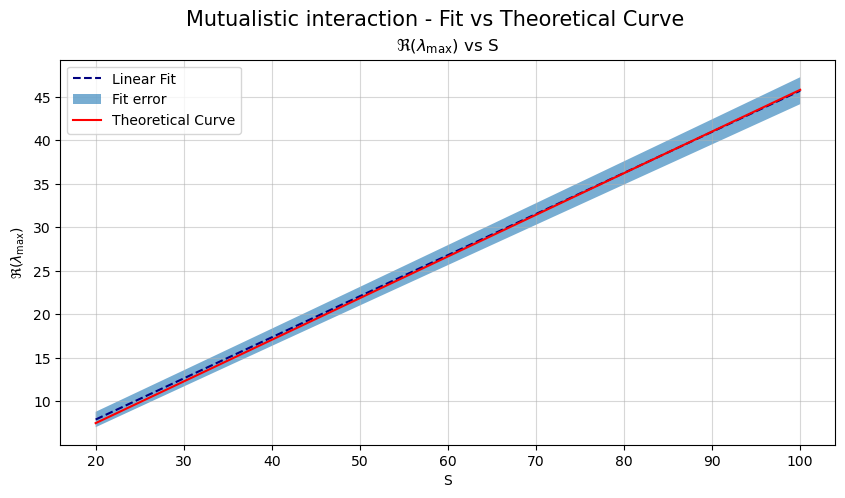

In [13]:
theo=(S-1)*C*sigma*np.sqrt(2/np.pi)-d
fit=f_1(S,*popt_1)

fig, ax=plt.subplots(figsize=(10,5))
plt.suptitle("Mutualistic interaction - Fit vs Theoretical Curve",fontsize=15)
ax.set(xlabel="S",ylabel="$\Re(\lambda_{\max})$",title="$\Re(\lambda_{\max})$ vs S ")
ax.grid(alpha=0.5)
ax.plot(S,fit,color="navy",label="Linear Fit",ls="dashed")
ax.fill_between(S,fit-np.sqrt(pcov_1[0,0]*pow(S,2)+pcov_1[1,1]),fit+np.sqrt(pcov_1[0,0]*pow(S,2)+pcov_1[1,1]),label="Fit error",alpha=0.6)
ax.plot(S,theo,color="red",label="Theoretical Curve")
ax.legend();

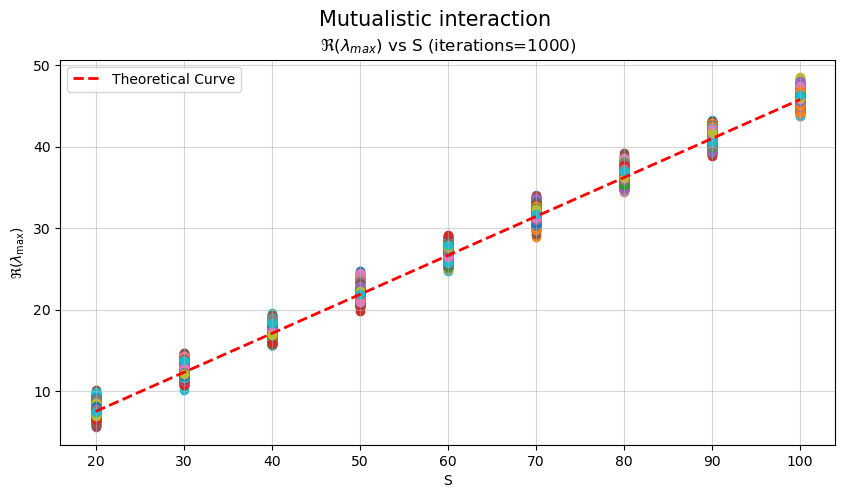

In [14]:
S=np.linspace(20,100,9)
iterations=1000

fig, ax = plt.subplots(figsize=(10,5))
plt.suptitle("Mutualistic interaction",fontsize=15)
ax.set(xlabel="S",ylabel="$\Re(\lambda_{\max})$",title="$\Re(\lambda_{max})$ vs S (iterations=1000)")
ax.grid(alpha=0.5)

for k in range(iterations):

    eigs=[]
    for s in S:
        M=MUTUAL_MARIX(int(s),C,d,sigma)
        eigs.append(eig_finder(M,norm=False))

    Re_max=[]
    for i in range(len(eigs)):
        Re_max.append(np.max(eigs[i][0]))
    
    ax.scatter(S,Re_max)

ax.plot(S,theo,ls="dashed",color="red",lw=2,label="Theoretical Curve")
ax.legend();


## 3. Food Web

In [15]:
df=pd.read_csv("Interactionstrength_matrix.csv",sep=";",header=None)
data=df.drop([0]).drop(columns=0)

S=data.shape[0]                                 #Species

str_matrix=np.array(data)
str_matrix_bin=np.zeros_like(str_matrix)

for i in range(S):
    for j in range(S):
        if (str_matrix[i,j]!= "0"):
            str_matrix_bin[i,j]=1


str_matrix_bin=str_matrix_bin.astype("float64")

C=str_matrix_bin.sum().astype("int32")/S**2     #Connectance
L=(C*S**2).astype("int32")                      #Links

### 3.1. Interasctionstrength Matrix

Here we visualize the Interactionstrength matrix of the considered system (249 species).
The original matrix have been converted in a binary form such that:
$$
\begin{cases}
a_{ij}=1 \quad \text{if} \quad j \quad \text{predates} \quad i \\
a_{ij}=0 \quad \text{if}  \quad i,j \quad \text{do not interact}
\end{cases}
$$

so in the heatmap below we associate to the black spots "1" and to the white ones "0".

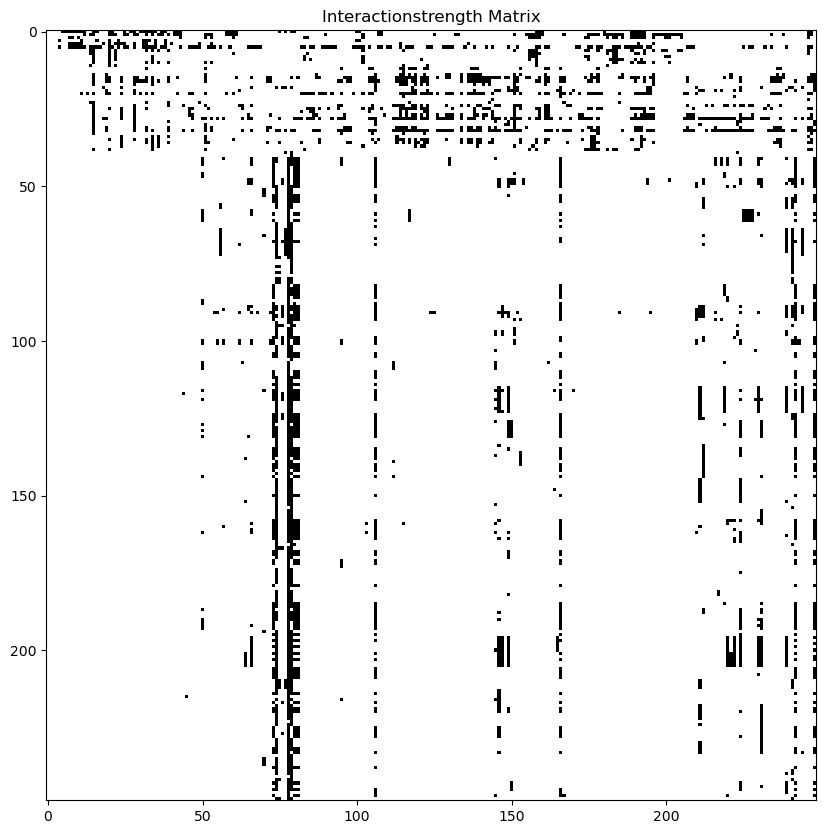

In [16]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Interactionstrength Matrix")
ax.imshow(str_matrix_bin,cmap="binary",interpolation=None);

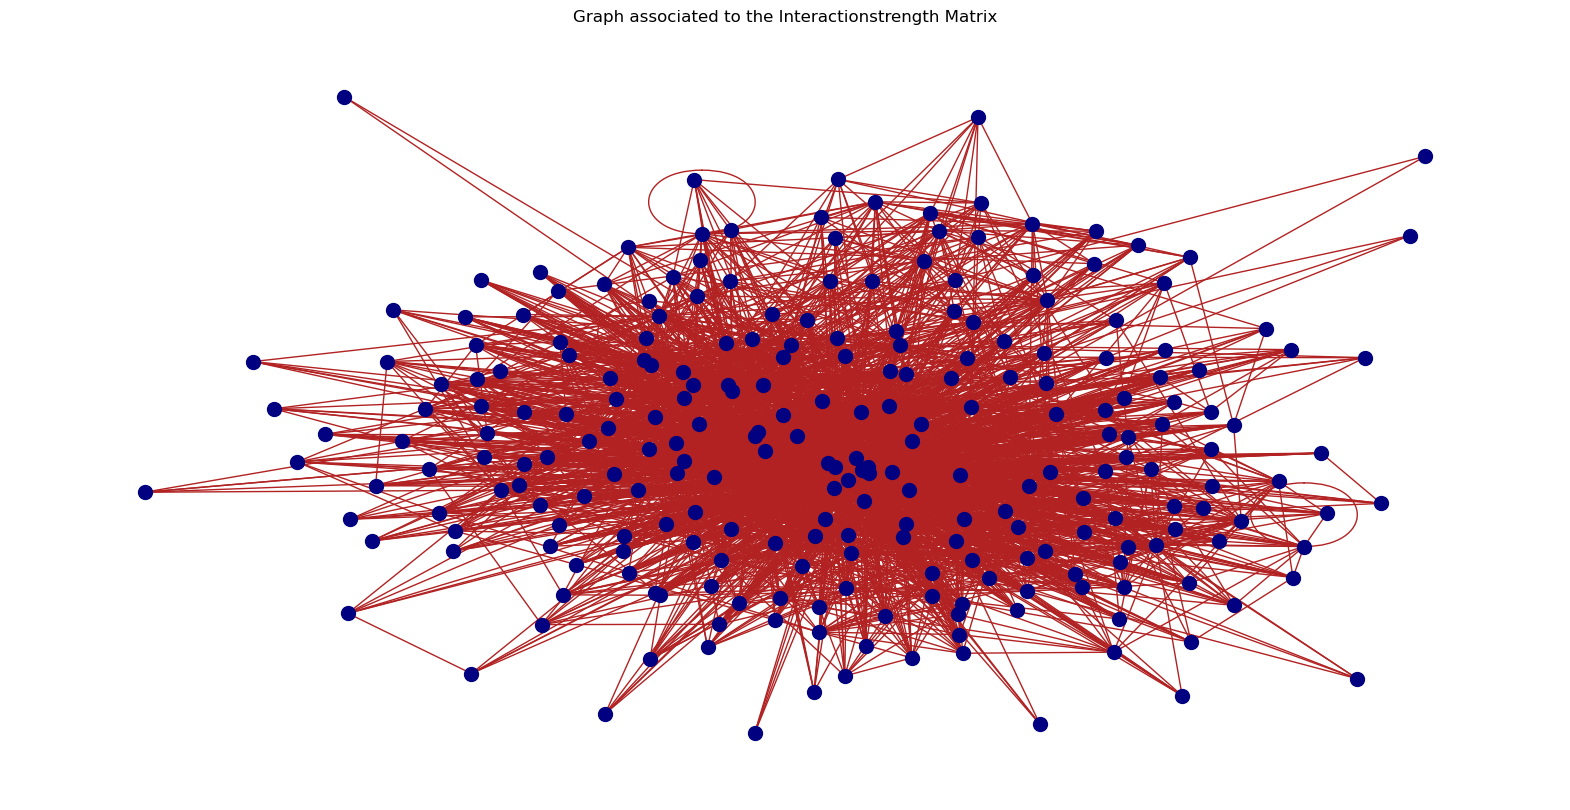

In [17]:
G=nx.from_numpy_array(str_matrix_bin)

fig = plt.subplots(figsize=(20,10))
plt.title("Graph associated to the Interactionstrength Matrix")
nx.draw(G,node_color="navy",node_size=100,edge_color="firebrick")

### 3.2. Generability/Vulnerability plot

Here we evaluate the Generability and the Vulnerability of each species from the definitions:

$$
G_i=\sum_{j=1}^S \frac{a_{ji}}{LS} \qquad V_i=\sum_{j=1}^S \frac{a_{ij}}{LS}
$$

where $S$ is the number of species and $L$ is the number of links between species. $L$ have been evaluated starting from the Connectance level $C$ as:

$$
L=CS^2
$$

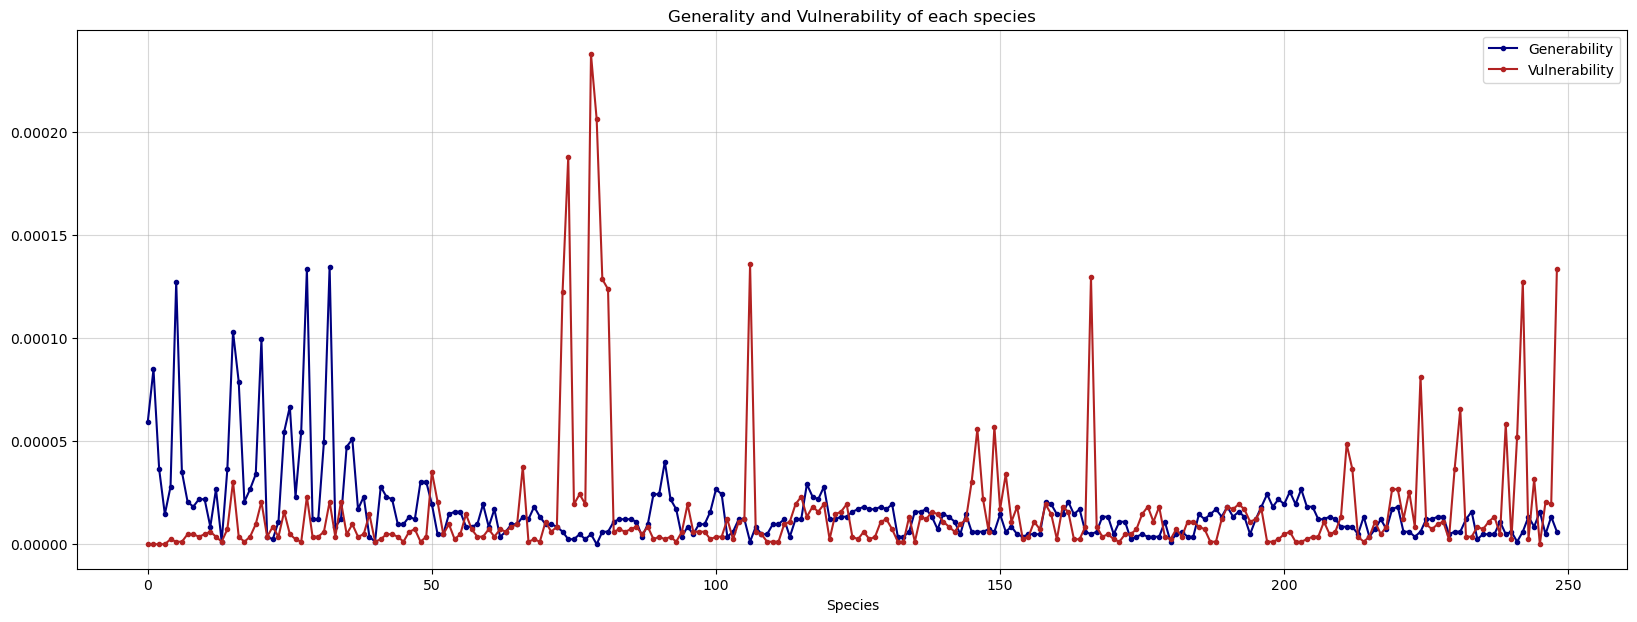

In [18]:
generality=np.einsum("ji->j",str_matrix_bin)/(L*S)
vulnerability=np.einsum("ij->j",str_matrix_bin)/(L*S)

x=np.arange(len(generality))

fig, ax=plt.subplots(figsize=(20,7))
ax.set(xlabel="Species",ylabel="", title="Generality and Vulnerability of each species")
ax.plot(x,generality,color="navy",label="Generability",marker=".")
ax.plot(x,vulnerability,color="firebrick",label="Vulnerability",marker=".")
ax.grid(alpha=0.5)
ax.legend();

### 3.3. Trophic Similarity Matrix

In this section the Trophic Similarity Matrix have been evaluated.
Such matrix is defined as:

$$
S_{ij}=\frac{1}{S}\sum_{k=1}^S\left(a_{ki}a_{kj}+a_{ik}a_{jk} \right)
$$

In [19]:
a=str_matrix_bin
trop_sim_matrix=(np.einsum("ki,kj",a,a)+np.einsum("ik,jk",a,a))/S

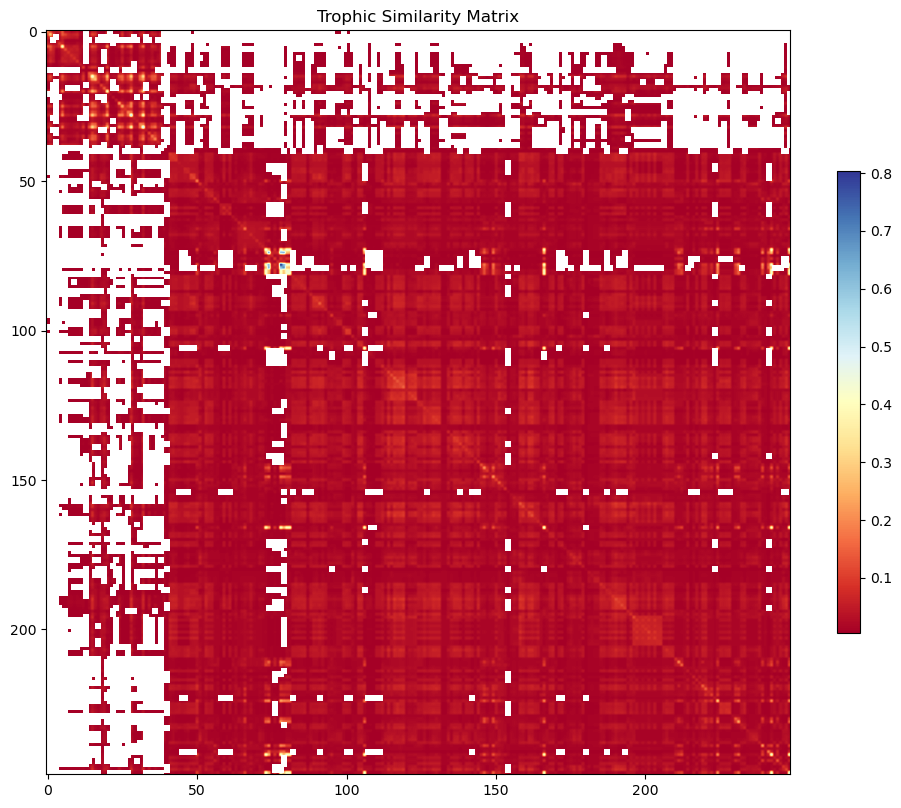

In [20]:
trop_sim_matrix = np.ma.masked_where(trop_sim_matrix == 0, trop_sim_matrix) 
cmap = plt.get_cmap("RdYlBu").copy()
cmap.set_bad(color='white')                 # in this way all "0" values are associated to "white" in the heatmap

fig, ax = plt.subplots(figsize=(12,12))
plt.title("Trophic Similarity Matrix")
heat=ax.imshow(trop_sim_matrix,cmap=cmap,interpolation=None)
fig.colorbar(heat,shrink=0.5);


## 4. Some other random matrices (optional)

In this section we just "play around" with some random matrices with different type of interaction. In particular we want observe if the Circular Law have been violated for specific interactions.

### 4.1. Random matrix with mutualistic interaction

In [21]:
S=5
C=0.6
d=1.6
sigma=1

M=MUTUAL_MARIX(S,C,d,sigma)

print("Example of Random matrix with mutual interaction: \n")
print(M)

Example of Random matrix with mutual interaction: 

[[-1.6         1.71821518  1.57142896  0.98650422  1.05065845]
 [ 1.19565788 -1.6         0.          0.          0.        ]
 [ 0.48852695  0.         -1.6         1.13262008  0.44612394]
 [ 0.53248716  0.          0.45492271 -1.6         0.        ]
 [ 2.18754793  0.          0.97637199  0.         -1.6       ]]


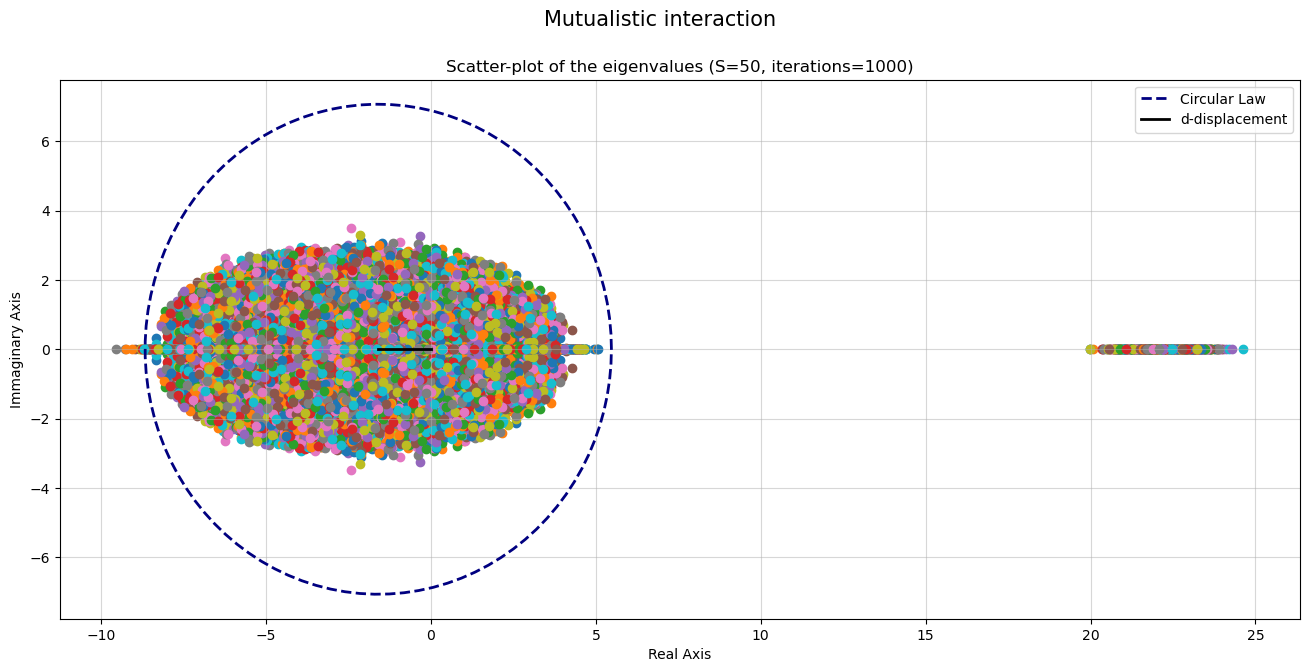

In [22]:
S=50
C=0.6
d=1.6
sigma=1

iterations=1000

rand_eig=[]

x_displacement=np.linspace(-d,0,100)
y_displacement=np.zeros_like(x_displacement)

theta=np.linspace(0,2*np.pi,100)
r=np.sqrt(S)*sigma
x=r*np.cos(theta)-d
y=r*np.sin(theta)

fig, ax = plt.subplots(figsize=(16,7))
plt.suptitle("Mutualistic interaction",fontsize=15)
ax.set(xlabel="Real Axis", ylabel="Immaginary Axis", title="Scatter-plot of the eigenvalues (S={}, iterations={})".format(S,iterations))
ax.grid(alpha=0.5)

for i in range(iterations):
    A=MUTUAL_MARIX(S,C,d,sigma)
    rand_eig.append(eig_finder(A,norm=False))

    ax.scatter(rand_eig[i][0],rand_eig[i][1])  

ax.plot(x,y,color="navy",linestyle="dashed",lw=2,label="Circular Law")
ax.plot(x_displacement,y_displacement,color="black",lw=2,label="d-displacement")
ax.legend();

### 4.2. Random matrix with predator-pray interatction 

In [23]:
S=5
C=0.6
d=1.6
sigma=1

M=PRED_PRAY_MARIX(S,C,d,sigma)

print("Example of Random matrix with predator-pray interaction: \n")
print(M)

Example of Random matrix with predator-pray interaction: 

[[-1.6         0.          0.78504686  0.          0.        ]
 [ 0.         -1.6         0.         -0.78606575 -0.76200814]
 [-0.07048677  0.         -1.6         0.          1.83313828]
 [ 0.          0.50586271  0.         -1.6        -0.47773425]
 [ 0.          0.43941113 -1.60627245  1.10357601 -1.6       ]]


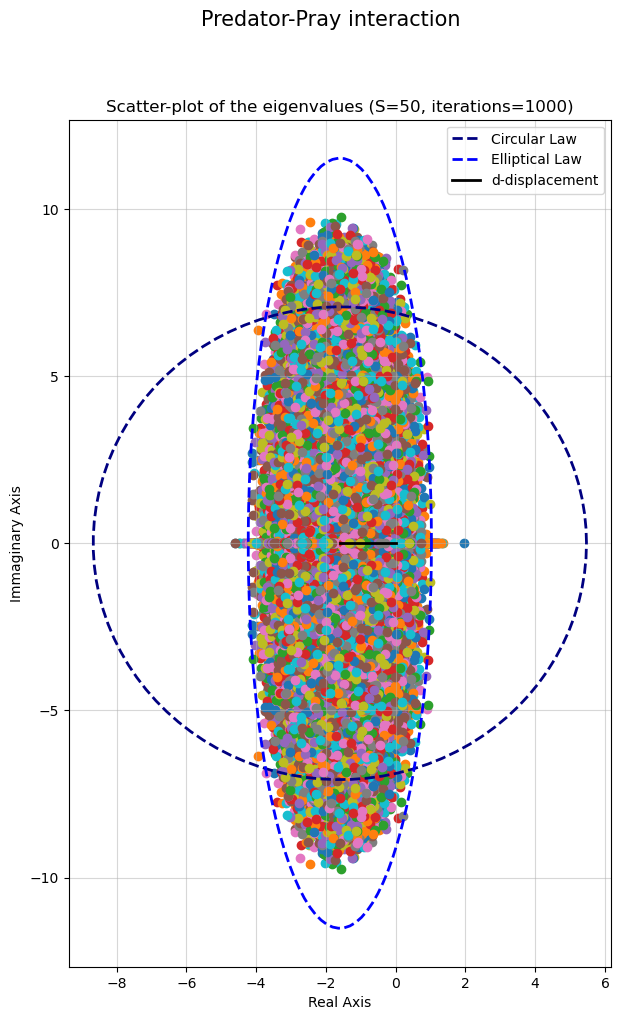

In [24]:
S=50
C=0.6
d=1.6
sigma=1

iterations=1000

rand_eig=[]

x_displacement=np.linspace(-d,0,100)
y_displacement=np.zeros_like(x_displacement)

theta=np.linspace(0,2*np.pi,100)
r=np.sqrt(S)*sigma
x=r*np.cos(theta)-d
y=r*np.sin(theta)

rho_iter=[]

fig, ax = plt.subplots(figsize=(7,11))
plt.suptitle("Predator-Pray interaction",fontsize=15)
ax.set(xlabel="Real Axis", ylabel="Immaginary Axis", title="Scatter-plot of the eigenvalues (S={}, iterations={})".format(S,iterations))
ax.grid(alpha=0.5)

for i in range(iterations):
    A=PRED_PRAY_MARIX(S,C,d,sigma)
    rand_eig.append(eig_finder(A,norm=False))

    ax.scatter(rand_eig[i][0],rand_eig[i][1])  
    rho_iter.append(-(np.einsum("ij",A)*np.einsum("ji",A)).mean()/C)

rho=max(rho_iter)

a=sigma*np.sqrt(S)*(1-rho)
b=sigma*np.sqrt(S)*(1+rho)

x_ell=a*np.cos(theta)-d
y_ell=b*np.sin(theta)

ax.plot(x,y,color="navy",linestyle="dashed",lw=2,label="Circular Law")
ax.plot(x_ell,y_ell,color="blue",linestyle="dashed",lw=2,label="Elliptical Law")
ax.plot(x_displacement,y_displacement,color="black",lw=2,label="d-displacement")
ax.legend();

### 4.3. Random matrix with predator-prey and mutualistic interaction

In [25]:
S=5
C=0.6
d=1.6
sigma=1

M=MIXED_MARIX(S,C,d,sigma)

print("Example of Random matrix with predator-pray and mutualistic interaction: \n")
print(M)

Example of Random matrix with predator-pray and mutualistic interaction: 

[[-1.6        -0.15455691 -0.39633352  0.          0.        ]
 [-1.27558593 -1.6        -0.28069818  0.34824563  0.        ]
 [-0.01297327 -0.13986255 -1.6        -0.40522953 -2.43888174]
 [ 0.          2.27144473 -1.57264612 -1.6         0.        ]
 [ 0.          0.         -0.88714413  0.         -1.6       ]]


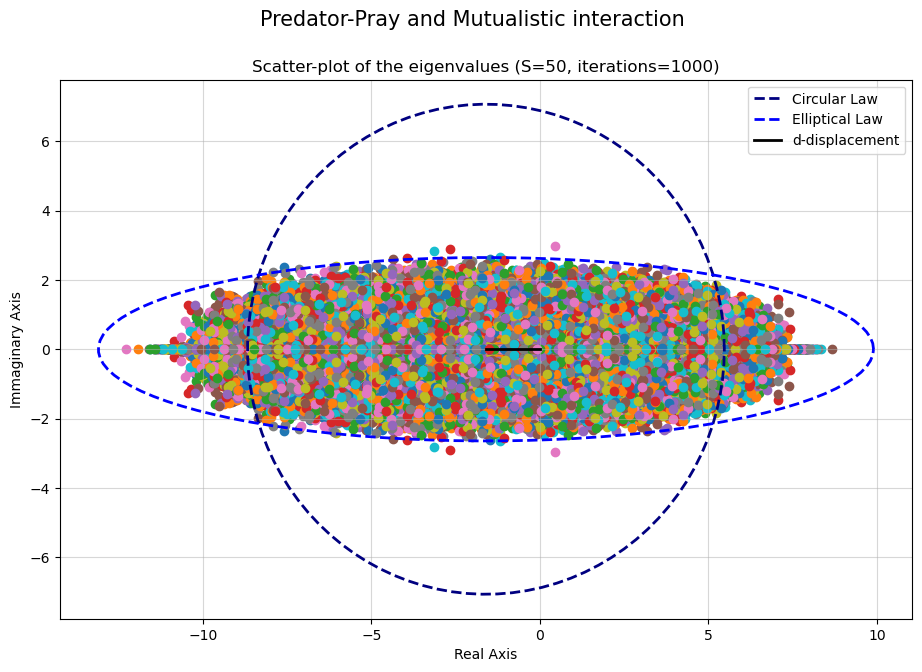

In [26]:
S=50
C=0.6
d=1.6
sigma=1

iterations=1000

rand_eig=[]

x_displacement=np.linspace(-d,0,100)
y_displacement=np.zeros_like(x_displacement)

theta=np.linspace(0,2*np.pi,100)
r=np.sqrt(S)*sigma
x=r*np.cos(theta)-d
y=r*np.sin(theta)

rho_iter=[]

fig, ax = plt.subplots(figsize=(11,7))
plt.suptitle("Predator-Pray and Mutualistic interaction",fontsize=15)
ax.set(xlabel="Real Axis", ylabel="Immaginary Axis", title="Scatter-plot of the eigenvalues (S={}, iterations={})".format(S,iterations))
ax.grid(alpha=0.5)

for i in range(iterations):
    A=MIXED_MARIX(S,C,d,sigma)
    rand_eig.append(eig_finder(A,norm=False))
    rho_iter.append(-(np.einsum("ij",A)*np.einsum("ji",A)).mean()/C)

    ax.scatter(rand_eig[i][0],rand_eig[i][1])  

rho=max(rho_iter)

a=sigma*np.sqrt(S)*(1-rho)
b=sigma*np.sqrt(S)*(1+rho)

x_ell=a*np.cos(theta)-d
y_ell=b*np.sin(theta)

ax.plot(x,y,color="navy",linestyle="dashed",lw=2,label="Circular Law")
ax.plot(x_ell,y_ell,color="blue",linestyle="dashed",lw=2,label="Elliptical Law")
ax.plot(x_displacement,y_displacement,color="black",lw=2,label="d-displacement")
ax.legend();

## 5. Cascade model (optional)

In [27]:
def CASCADE(S,C):
    #"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    # Function that generates Interactionstrength Matrix for Cascade Model
    #
    # @S: int, number of species
    # @C: float, desired level of connectance
    #
    # Returns: numpy array, the Interactionstrength Matrix
    #"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

    N_values=np.random.uniform(0,1,S)
    p=(2*S*C)/(S-1)
    M=np.zeros((S,S))

    for i in range(len(N_values)):
        for j in range(len(N_values)):
            if (N_values[i]>N_values[j]):
                M[i,j]=np.random.uniform()
                if (M[i,j]<p):
                    M[i,j]=1
                else: M[i,j]=0
    return M

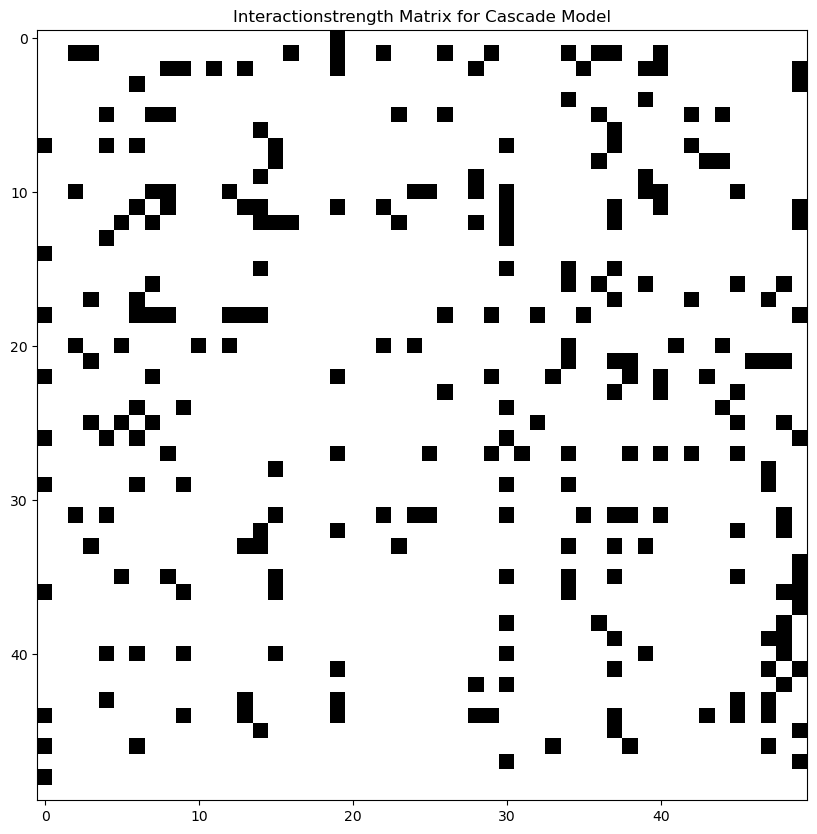

In [28]:
S=50
C=0.1
L=C*S**2

M=CASCADE(S,C)

fig, ax = plt.subplots(figsize=(10,10))
plt.title("Interactionstrength Matrix for Cascade Model")
ax.imshow(M,cmap="binary",interpolation=None);

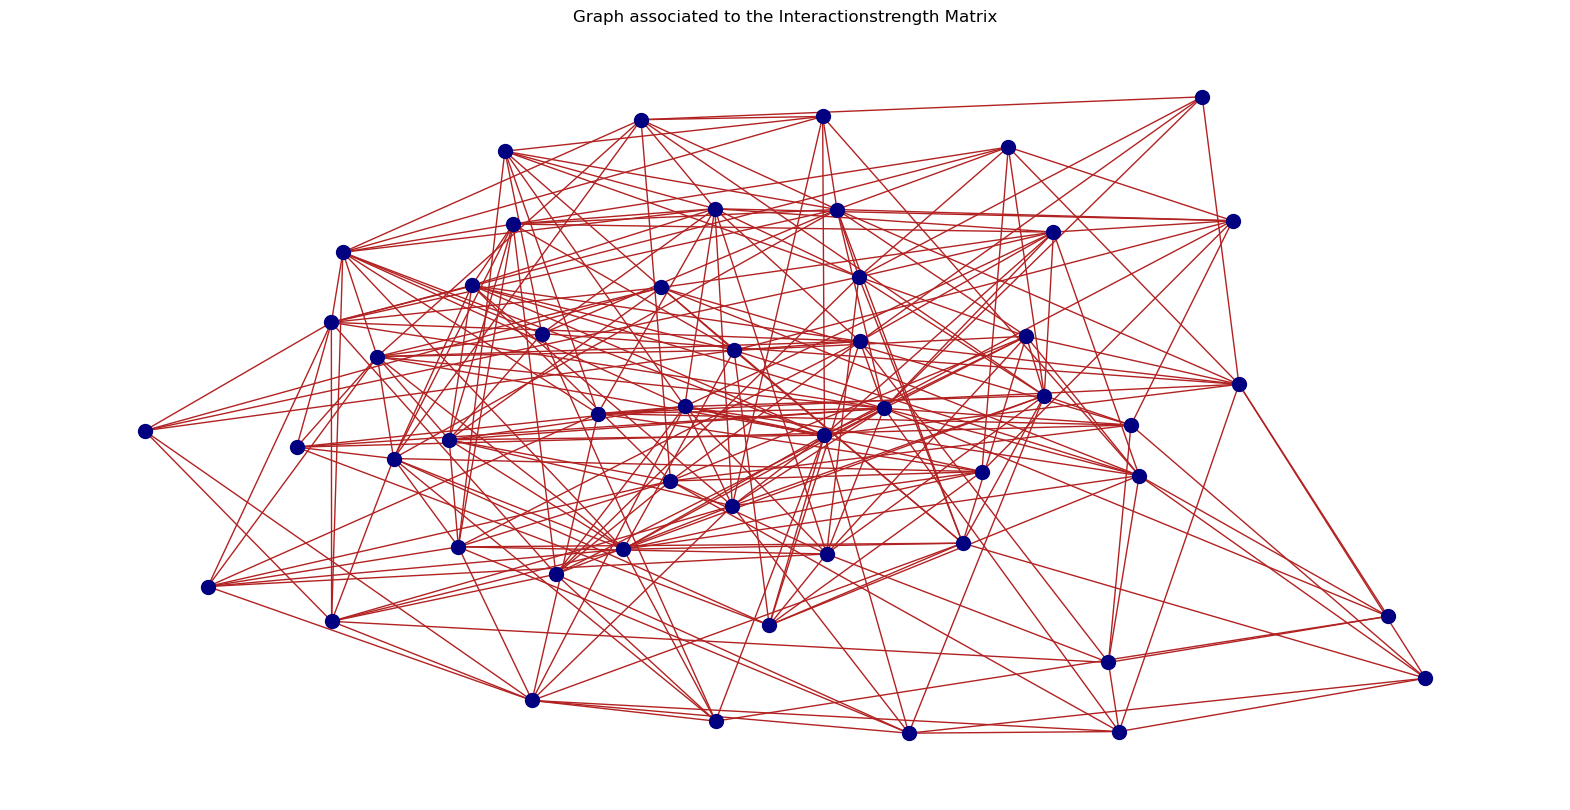

In [29]:
G=nx.from_numpy_array(M)

fig = plt.subplots(figsize=(20,10))
plt.title("Graph associated to the Interactionstrength Matrix")
nx.draw(G,node_color="navy",node_size=100,edge_color="firebrick")

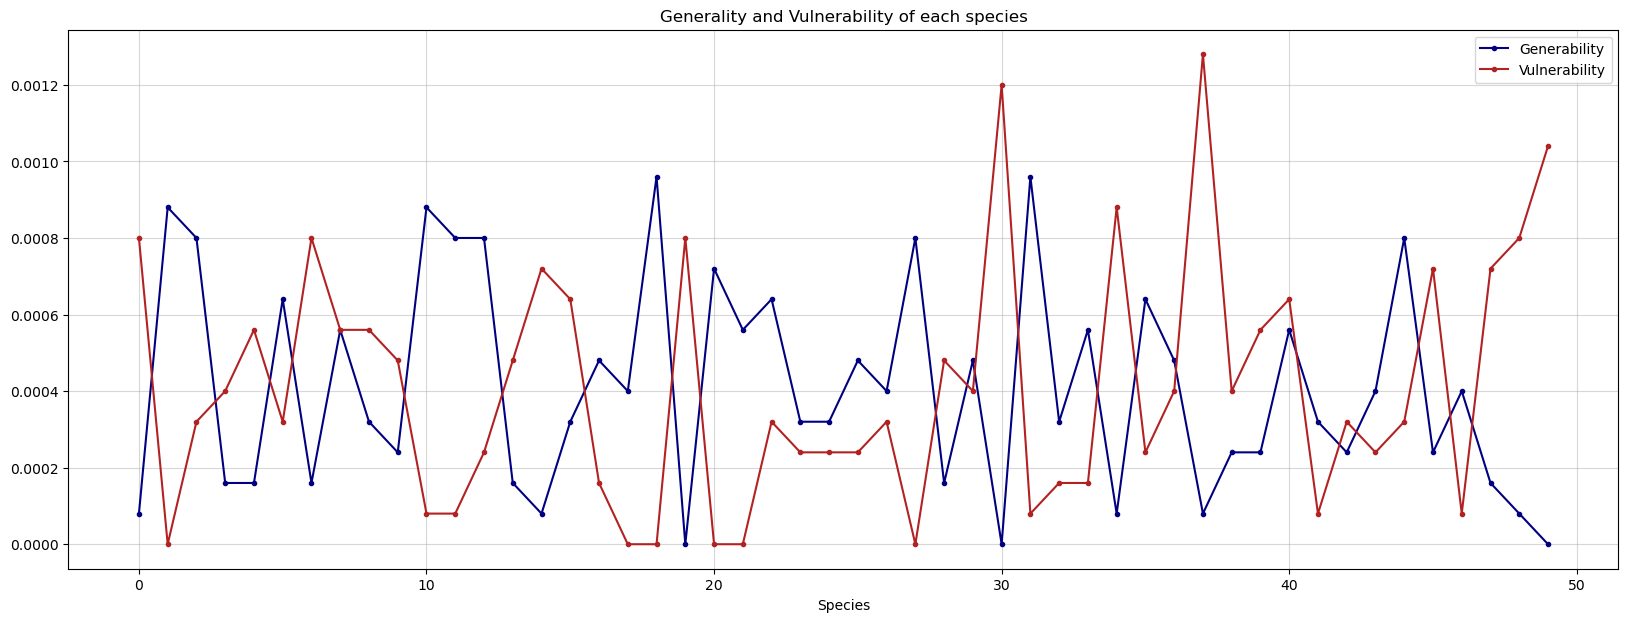

In [30]:
generality=np.einsum("ji->j",M)/(L*S)
vulnerability=np.einsum("ij->j",M)/(L*S)

x=np.arange(len(generality))

fig, ax=plt.subplots(figsize=(20,7))
ax.set(xlabel="Species",ylabel="", title="Generality and Vulnerability of each species")
ax.plot(x,generality,color="navy",label="Generability",marker=".")
ax.plot(x,vulnerability,color="firebrick",label="Vulnerability",marker=".")
ax.grid(alpha=0.5)
ax.legend();

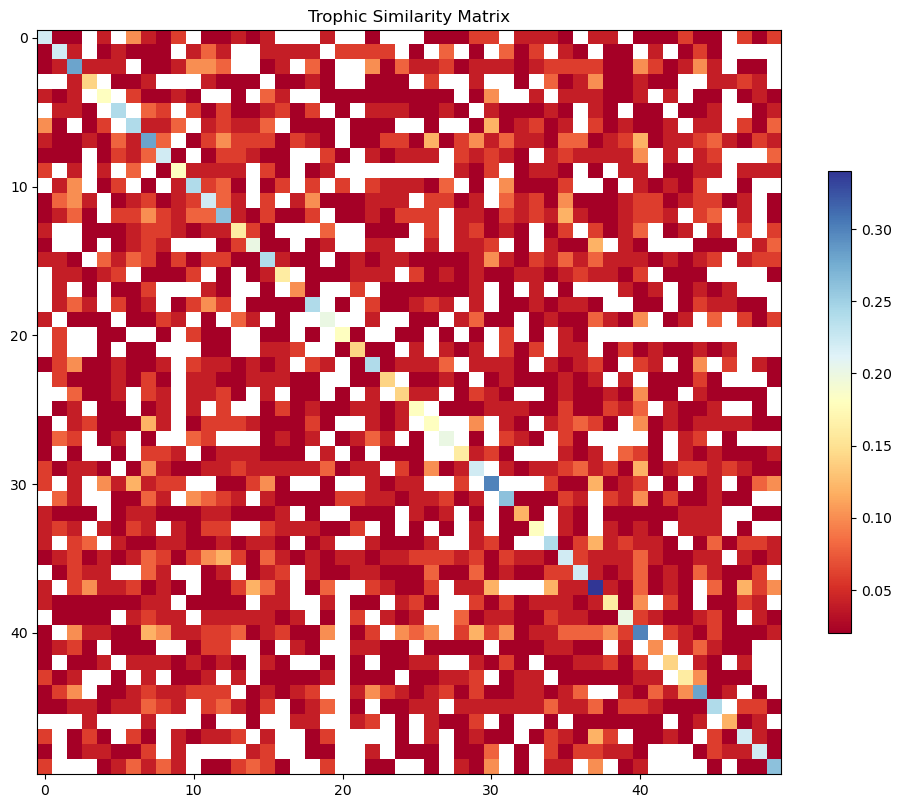

In [31]:
trop_sim_matrix=(np.einsum("ki,kj",M,M)+np.einsum("ik,jk",M,M))/S

trop_sim_matrix = np.ma.masked_where(trop_sim_matrix == 0, trop_sim_matrix) 
cmap = plt.get_cmap("RdYlBu").copy()
cmap.set_bad(color='white')                 # in this way all "0" values are associated to "white" in the heatmap

fig, ax = plt.subplots(figsize=(12,12))
plt.title("Trophic Similarity Matrix")
heat=ax.imshow(trop_sim_matrix,cmap=cmap,interpolation=None)
fig.colorbar(heat,shrink=0.5);